# Bonus Material: Polynomial Regression

The bonus material provides codes for some model selection concepts we have not completely covered in the lab.

- Bias-variance trade-off
- Generalization bound
- Credible intervals





Now that you helped Boltzmann successfully differentiate Chihuahuas and blueberry muffins, he has a new request.

He wants to predict **where a chihuahua is likely to be in the future, given their current location**.

This will help him preemptively sort out any messes before they happen.

An ancient text called the "Book of Chihuahuas" said that the future location of chihuahua is a polynomial function of its current location.

We have some pairs of (current location, future location) of chihuahuas in the magic room. For simplicity, we will focus on a single coordinate now.

Let's help Boltzmann predict the future location of chihuahuas using **polynomial regression**!

#### 1. Bias-variance trade-off

We try out different polynomial degrees to see how they perform on the test set.

What do you observe? Can you use what we learned in class to explain this phenomenon?

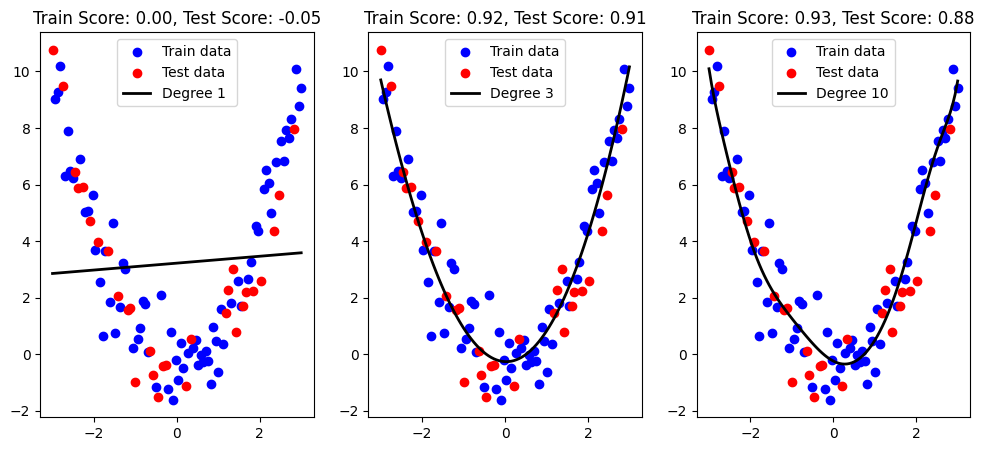

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# 2nd order polynomial
y = X**2 + np.random.normal(0, 1, X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different polynomial degrees
degrees = [1, 3, 10]
plt.figure(figsize=(12, 5))

for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred = model.predict(X_plot)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="red", label="Test data")
    plt.plot(X_plot, y_pred, color="black", lw=2, label=f"Degree {d}")
    plt.title(f"Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")
    plt.legend()

plt.show()


#### 2. Generalization Bound

Boltzmann's friend also wants to predict the future location of chihuahuas.

However, his friend has fewer data than us and wonders how well his model will perform.

Let's help him by plotting the learning curve!

What do you observe? Can you use what we learned in class to explain this phenomenon?

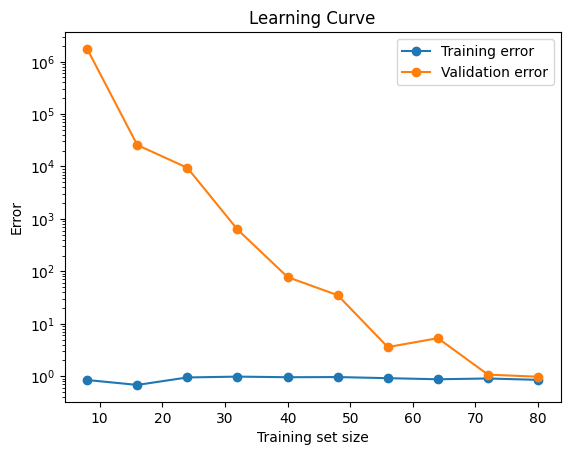

In [2]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="neg_mean_squared_error"
    )

    train_errors = -train_scores.mean(axis=1)
    val_errors = -val_scores.mean(axis=1)

    plt.plot(train_sizes, train_errors, label="Training error", marker="o")
    plt.plot(train_sizes, val_errors, label="Validation error", marker="o")
    plt.xlabel("Training set size")
    plt.ylabel("Error")
    plt.yscale("log")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()


model = make_pipeline(PolynomialFeatures(3), LinearRegression())
plot_learning_curve(model, X, y)

#### 3. Credible Intervals

/Users/lavender/Desktop/DS-GA-1003-Machine-Learning-2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


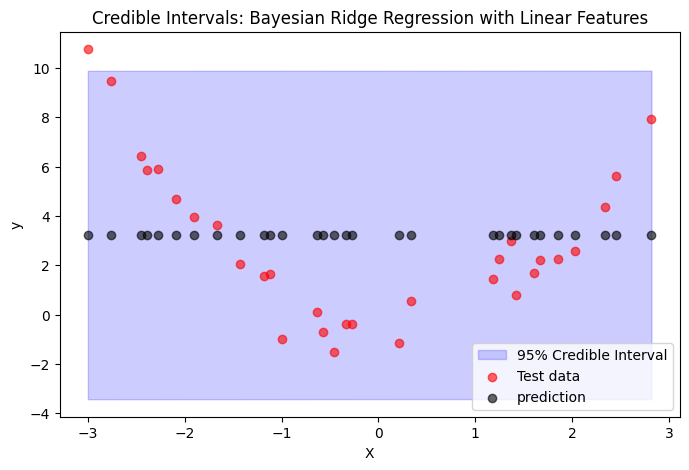

/Users/lavender/Desktop/DS-GA-1003-Machine-Learning-2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


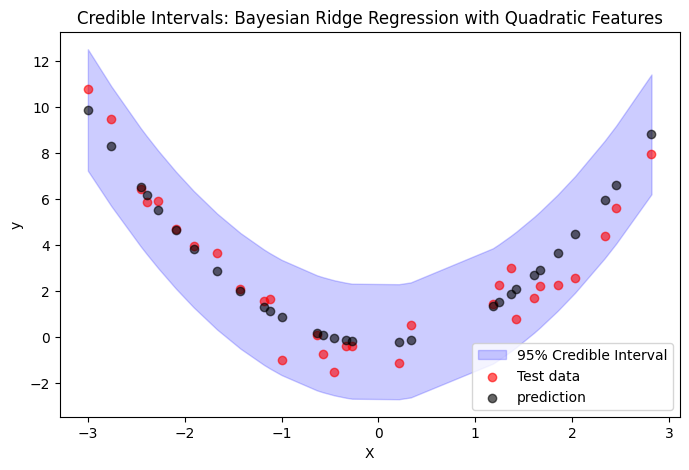

In [3]:
from sklearn.linear_model import BayesianRidge

# Train Bayesian regression model
def fit_and_plot_bayes(bayes_model, name):
    bayes_model.fit(X_train, y_train)

    # Predict with uncertainty estimation
    y_pred, std_dev = bayes_model.predict(X_test, return_std=True)

    # Sort test set for proper plotting
    sort_idx = np.argsort(X_test.ravel())  # Get sorted indices
    X_sorted = X_test.ravel()[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    std_dev_sorted = std_dev[sort_idx]

    # Plot predictions with approximate credible intervals (~1.96 std assuming gaussian posterior)
    plt.figure(figsize=(8, 5))
    plt.fill_between(
        X_sorted,
        y_pred_sorted - 2 * std_dev_sorted,
        y_pred_sorted + 2 * std_dev_sorted,
        alpha=0.2,
        color="blue",
        label="95% Credible Interval",
    )
    plt.scatter(X_test, y_test, color="red", label="Test data", alpha=0.6)
    plt.scatter(X_sorted, y_pred_sorted, label="prediction", color="black", alpha=0.6)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Credible Intervals: {name}")
    plt.legend(loc="lower right")
    plt.show()

linear_bayes_model = BayesianRidge()
fit_and_plot_bayes(linear_bayes_model, "Bayesian Ridge Regression with Linear Features")
quadratic_bayes_model = make_pipeline(PolynomialFeatures(degree=2), BayesianRidge()) 
fit_and_plot_bayes(quadratic_bayes_model, "Bayesian Ridge Regression with Quadratic Features")

#### 4. Hyperparameter tuning: degree of polynomial

We can do grid search to find the best degree of polynomial model for this dataset.

What do you observe?

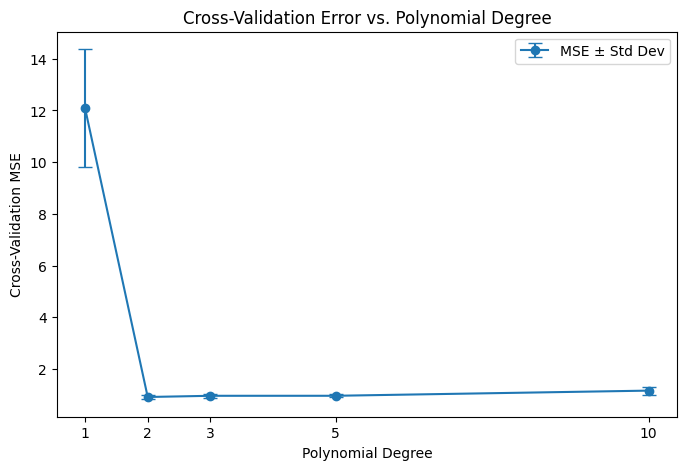

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define model pipeline
degrees = [1, 2, 3, 5, 10]
cv_results = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    mean_score = -np.mean(scores)  # Convert back to positive MSE
    std_score = np.std(scores)
    cv_results.append((degree, mean_score, std_score))

# Convert to numpy array for easy plotting
cv_results = np.array(cv_results)

# Plot CV performance
plt.figure(figsize=(8, 5))
plt.errorbar(cv_results[:, 0], cv_results[:, 1], yerr=cv_results[:, 2], fmt="-o", capsize=5, label="MSE ± Std Dev")
plt.xlabel("Polynomial Degree")
plt.ylabel("Cross-Validation MSE")
plt.title("Cross-Validation Error vs. Polynomial Degree")
plt.xticks(degrees)
plt.legend()
plt.show()

In [5]:
# Define model pipeline
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define hyperparameters to search over
param_grid = {"polynomialfeatures__degree": [1, 2, 3, 5, 10]}

# Perform cross-validation grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best model
print(f"Best degree: {grid_search.best_params_['polynomialfeatures__degree']}")

Best degree: 2
